In [1]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import torchvision.utils as vutils
from torchvision import transforms, utils
from dataset import ArtDataset
from torch.utils.data import Dataset, DataLoader

In [203]:
img_size = 64
batch_size = 36

# Create transformer
transforms_ = [
    transforms.Resize(img_size),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]

# Create the dataset
data_root = "../data/images/images"
# data_root = "../data/best_artworks_of_all_time/normal"
dataset = ArtDataset(data_root, transforms_=transforms_)

# Define dataset parameters
dataset_params = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2
}

# Create the dataloader
dataloader = DataLoader(dataset, **dataset_params)

In [204]:
# Grab a batch of real images from the dataloader
real_imgs = next(iter(dataloader))
print(real_imgs.size())
# real_batch[0].to(device)[:64]

torch.Size([36, 3, 64, 64])


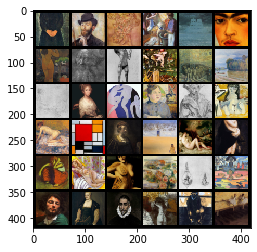

In [4]:
plt.imshow(np.transpose(vutils.make_grid(real_imgs, nrow=int(np.sqrt(real_imgs.size(0))), padding=5, normalize=True), (1,2,0)))

In [5]:
x = np.random.rand(1,2,3)
print(x)

[[[0.29490137 0.32500315 0.63368308]
  [0.71712279 0.81341508 0.78545581]]]


In [6]:
x[-1]

array([[0.29490137, 0.32500315, 0.63368308],
       [0.71712279, 0.81341508, 0.78545581]])

In [7]:
y = [[1, 2], [2, 2]]
y[-1]

[2, 2]

In [77]:
np.transpose(x, (2,1,0))

array([[[0.29490137],
        [0.71712279]],

       [[0.32500315],
        [0.81341508]],

       [[0.63368308],
        [0.78545581]]])

In [9]:
imgs = np.array(real_imgs)

In [10]:
imgs.shape

(36, 3, 64, 64)

In [11]:
np.transpose(imgs[-1], (2,1,0)).shape

(64, 64, 3)

In [12]:
real_imgs[0].size()

torch.Size([3, 64, 64])

In [13]:
vutils.make_grid(real_imgs[0]).size()

torch.Size([3, 64, 64])

In [14]:
from utils import *

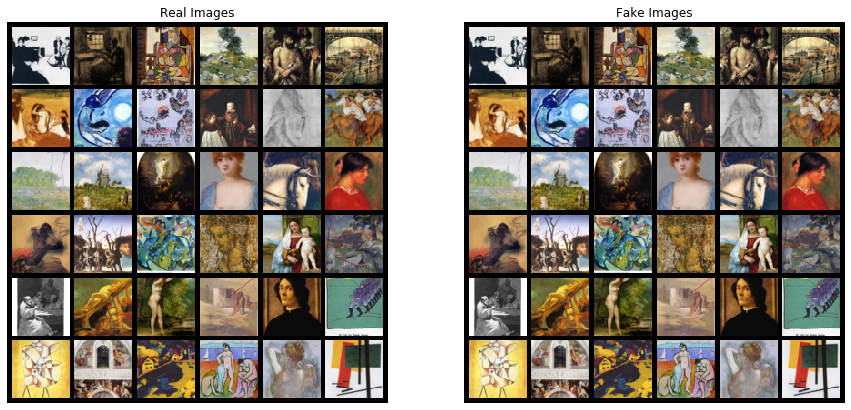

In [118]:
plot_real_vs_fake(real_imgs, real_imgs)

In [26]:
import itertools as it
import torch

In [68]:
img_list =  it.repeat(real_imgs, 5)

In [205]:
img_list = [ np.transpose(real_imgs, (0, (i+1) % 3 + 1, (i+2) % 3 + 1, (i+3) % 3 + 1)) for i in range(9) ]
img_list2 = [ torch.from_numpy(np.random.permutation(real_imgs)) for i in range(9) ]b

In [214]:
int(np.sqrt(img_list2[0].size(0)))

6

In [223]:
def plot_animation2(img_list, save_path="../images/real_vs_fake.gif", show=False):
    fig = plt.figure(figsize=(20,20))
    plt.axis("off")
    ims = [[plt.imshow(np.transpose(vutils.make_grid(i, padding=2, nrow=int(np.sqrt(i.size(0))), normalize=True), (1,2,0)), animated=True)] for i in img_list]
    anim = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
    if show:
        plt.show()
    anim.save(save_path, writer='imagemagick', dpi=30)

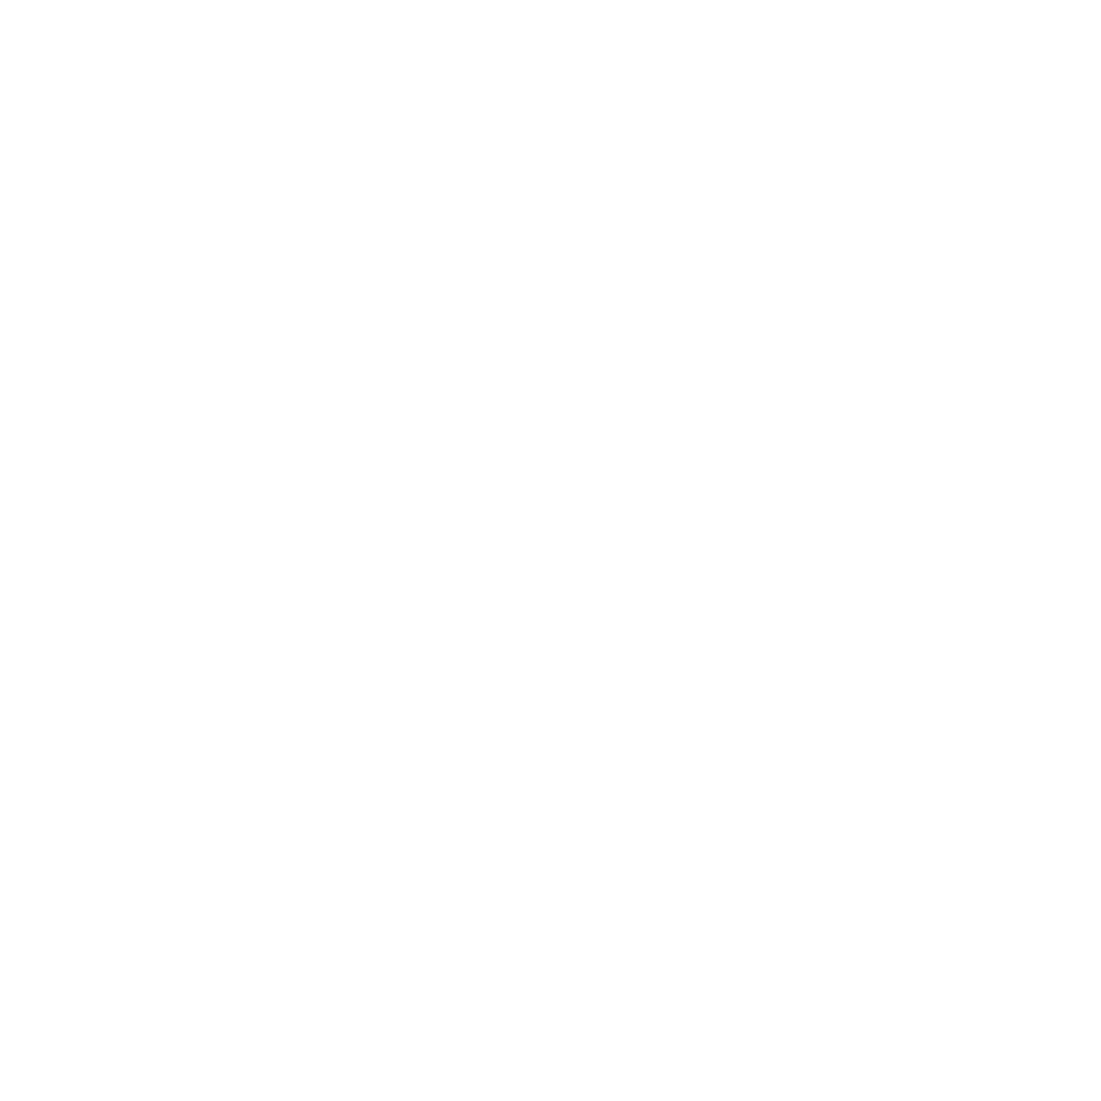

In [224]:
plot_animation2(img_list2, show=True)